In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
face_cascade = cv.CascadeClassifier('C:\\Users\\wangy\\Anaconda2\\Lib\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('C:\\Users\\wangy\\Anaconda2\\Lib\\site-packages\\cv2\\data\\haarcascade_eye.xml')
print ('fail: ', eye_cascade.empty(),(face_cascade.empty()))
imgEye = []
img = cv.imread('wyc7.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')


fail:  False False


(1733, 813, 701, 701)
(593, 913, 587, 587)
(1598, 1848, 183, 183)
(1486, 1704, 446, 446)
(1137, 1814, 343, 343)


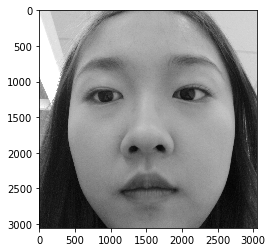

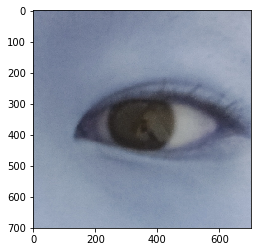

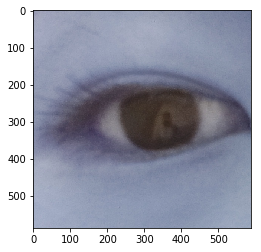

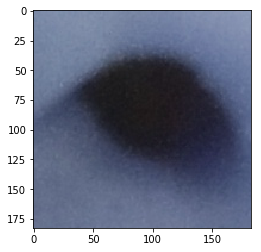

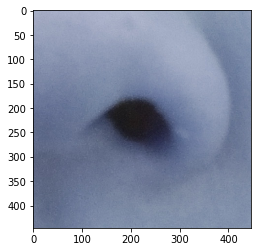

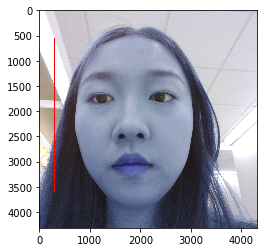

In [2]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    plt.imshow(roi_gray,cmap='gray')
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_gray,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        imgEye.append(roi_color[ey:ey+eh, ex:ex+ew])
        print((ex,ey,ew,eh))
        cropimg = roi_gray[ey:(ey+eh),ex:(ex+ew)]
for i in range (len(imgEye)):
    plt.figure()
    plt.imshow(imgEye[i], cmap='gray')
plt.imshow(img,cmap='gray')

[[138 140 138 ... 162 162 162]
 [140 139 138 ... 165 165 165]
 [141 140 140 ... 165 164 162]
 ...
 [176 175 177 ... 184 185 186]
 [177 177 177 ... 183 183 183]
 [176 176 175 ... 181 181 181]]
440925


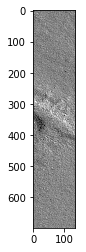

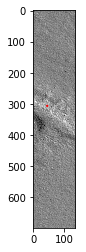

In [4]:
from scipy import signal

# eye corner filter
left_corner_filter = np.array([[-1, -1, -1, 1, 1, 1], [-1, -1, -1, -1, 1, 1],[-1, -1, -1, -1, -1, 1],[1,1,1,1,1,1]])
right_corner_filter = np.array([[1,1,1,-1,-1,-1],[1,1,-1,-1,-1,-1],[1,-1,-1,-1,-1,-1],[1,1,1,1,1,1]])

right_eye = cv.cvtColor(imgEye[0], cv.COLOR_BGR2GRAY)
left_eye = cv.cvtColor(imgEye[1], cv.COLOR_BGR2GRAY)
print(right_eye)
print(np.argmax(right_eye))

# right eye : imgEye[1]
# left eye : imgEye[2]
left_eye_l = left_eye[:,:np.int(left_eye.shape[1]*0.25)]
left_eye_r = left_eye[:,np.int(left_eye.shape[1]*0.25):]

# filtered_left = signal.convolve2d(left_eye_l, left_corner_filter,mode='valid')
# plt.imshow(filtered_left,cmap='gray')
# maxpl = np.array([(int) (np.argmax(filtered_left)/filtered_left.shape[1]), np.argmax(filtered_left)%filtered_left.shape[1]])
# fig, ax = plt.subplots(1)
# ax.imshow(filtered_left,cmap='gray')
# ax.add_patch(plt.Circle((maxpl[1], maxpl[0]), radius=2, color='red'))

right_eye_r = right_eye[:,np.int(right_eye.shape[1]*0.8):right_eye.shape[1]]
right_eye_l = right_eye[:,0:np.int(right_eye.shape[1]*0.8)]

filtered_right = signal.convolve2d(right_eye_r, right_corner_filter,mode='valid')
plt.imshow(filtered_right,cmap='gray')
maxpr = np.array([(int) (np.argmax(filtered_right)/filtered_right.shape[1]), np.argmax(filtered_right)%filtered_right.shape[1]])
fig, ax = plt.subplots(1)
ax.imshow(filtered_right,cmap='gray')
ax.add_patch(plt.Circle((maxpr[1], maxpr[0]), radius=2, color='red'))

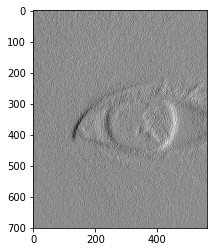

In [9]:
lap_r = cv.Laplacian(right_eye,cv.CV_64F)
gradx_r = (cv.Sobel(right_eye_l,cv.CV_64F,1,0,ksize=5))
grady_r = cv.Sobel(right_eye_l,cv.CV_64F,0,1,ksize=5)
plt.imshow(gradx_r, cmap='gray')
grad_r = np.sqrt(gradx_r**2+grady_r**2)


# lap_l = cv.Laplacian(left_eye,cv.CV_64F)
# gradx_l = cv.Sobel(left_eye_r,cv.CV_64F,1,0,ksize=5)
# grady_l = cv.Sobel(left_eye_r,cv.CV_64F,0,1,ksize=5)
# plt.imshow(gradx, cmap='gray')
# grad_l = np.sqrt(gradx_l**2+grady_l**2)

# print(grad.shape)

NameError: name 'gradx' is not defined

<Figure size 432x288 with 0 Axes>

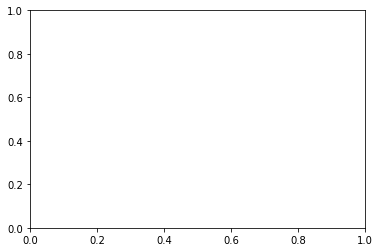

In [6]:
d = right_eye*0.4

plt.figure()
fig, ax = plt.subplots(1)
ax.imshow(gradx,cmap='gray')
plt.title('gradx')
row, col = gradx.shape[0], gradx.shape[1]
ranks = np.argsort(gradx.flatten())

rankr = (ranks[-25:] % col).astype('int')
rankc = (ranks[-25:] / col).astype('int')
for i in range(25):
    ax.add_patch(plt.Circle((rankr[i], rankc[i]), radius=1, color='red'))
max_x = rankc
max_y = rankr

rankr = (ranks[0:100] % col).astype('int')
rankc = (ranks[0:100] / col).astype('int')
for i in range(100):
    ax.add_patch(plt.Circle((rankr[i], rankc[i]), radius=1, color='blue'))
min_x = rankc
min_y = rankr

temp = []
for i in range(len(max_x)):
    if (max_x[i] < np.amin(min_x)):
        temp.append(i)
max_x = np.delete(max_x,temp,None)
max_y = np.delete(max_y,temp,None)

In [ ]:
# # Ellipse Fitting

# import ellipses as el
# from matplotlib.patches import Ellipse

# y = np.append(min_x,max_x)
# x = np.append(min_y,max_y)
# dataP = list([x,y])

# data = dataP

# lsqe = el.LSqEllipse()
# lsqe.fit(data)
# center, width, height, phi = lsqe.parameters()
# plt.close('all')
# fig = plt.figure(figsize=(6,6))
# ax = fig.add_subplot(111)
# ax.axis('equal')
# ax.plot(data[0], data[1], 'ro', label='test data', zorder=1)
# ax.imshow(imgEye[0], cmap='gray')
# plt.plot(maxpr[1], maxpr[0], '+')
# ellipse = Ellipse(xy=center, width=2*width, height=2*height, angle=np.rad2deg(phi),
#                edgecolor='b', fc='None', lw=2, label='Fit', zorder = 2)
# ax.add_patch(ellipse)
# # arrow = plt.Arrow(x=maxpr[1], y=maxpr[0], dx=center[0]-maxpr[1], dy=center[1]-maxpr[0], width=30)
# # ax.add_patch(arrow)
# # vec = np.sqrt((center[0]-maxpr[1])**2 + (center[1]-maxpr[0])**2)
# plt.title('Gaze Vector Mag = '+str(round(vec,1))+' pixels')
# plt.plot(center[0],center[1], '+')
# plt.legend()
# plt.show()


# Circle Fitting
def cfit(data,maxpR):  
    # coordinates of the barycenter
    x_m = mean(x)
    y_m = mean(y)
    
    # calculation of the reduced coordinates
    u = x - x_m
    v = y - y_m
    
    # linear system defining the center (uc, vc) in reduced coordinates:
    #    Suu * uc +  Suv * vc = (Suuu + Suvv)/2
    #    Suv * uc +  Svv * vc = (Suuv + Svvv)/2
    Suv  = sum(u*v)
    Suu  = sum(u**2)
    Svv  = sum(v**2)
    Suuv = sum(u**2 * v)
    Suvv = sum(u * v**2)
    Suuu = sum(u**3)
    Svvv = sum(v**3)
    
    # Solving the linear system
    A = array([ [ Suu, Suv ], [Suv, Svv]])
    B = array([ Suuu + Suvv, Svvv + Suuv ])/2.0
    uc, vc = linalg.solve(A, B)
    
    xc_1 = x_m + uc
    yc_1 = y_m + vc
    
    # Calcul des distances au centre (xc_1, yc_1)
    Ri_1     = sqrt((x-xc_1)**2 + (y-yc_1)**2)
    R_1      = mean(Ri_1)
    residu_1 = sum((Ri_1-R_1)**2)
    
    center = (xc_1, yc_1)
    vector = [(center[0]-maxpR[1]), (center[1]-maxpR[0])]
    vecmag = np.sqrt(vector[0]**2+vector[1]**1)
    
    return (center,vector)

center,_ = 